In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, confusion_matrix


In [302]:
db = 'Urinary_2-10'

In [ ]:
if db == 'Refseq':
    pred_file = 'blastn/preds_blastn_refseq_in_house_dna_seq'
elif db == 'Urinary_2-10':
    pred_file = 'blastn/preds_blastn_urinary_max10_min2_dna_seq'

path_to_file = '../preds/' + pred_file + '.csv'
pred = pd.read_csv(path_to_file)

test = pd.read_csv('../datasets/test_sets/test_set_from_refseq.csv')

In [304]:
pred = pred.fillna('undefined')

In [305]:
taxonomy_levels = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']

for level in taxonomy_levels[-3:]:
    print(level)
    accuracy = accuracy_score(test[level], pred[level])
    precision = precision_score(test[level], pred[level], average = 'weighted', zero_division = np.nan)
    f1 = f1_score(test[level], pred[level], average = 'weighted', zero_division = np.nan)
    print('accuracy : {}, precision : {}, f1 : {}'.format(accuracy, precision, f1))
    

family
accuracy : 0.9940688018979834, precision : 0.9945987464946846, f1 : 0.9939080639356583
genus
accuracy : 0.9822064056939501, precision : 0.9888454270597127, f1 : 0.9822753221683648
species
accuracy : 0.8920521945432978, precision : 0.9649845707024868, f1 : 0.8819578602496753


In [306]:
test = test.rename({'domain' : 'true_domain',
                    'phylum' : 'true_phylum',
                    'class' : 'true_class',
                    'order' : 'true_order',
                    'family' : 'true_family',
                    'genus' : 'true_genus',
                    'species' : 'true_species'}, axis = 1)
                

pred = pred.rename({'domain' : 'pred_domain',
                    'phylum' : 'pred_phylum',
                    'class' : 'pred_class',
                    'order' : 'pred_order',
                    'family' : 'pred_family',
                    'genus' : 'pred_genus',
                    'species' : 'pred_species',
                    'test_seq_id' : 'seq_id'}, axis = 1)


In [307]:
global_data = test.merge(right = pred, on = 'seq_id')
global_data = global_data.drop(['dna_seq', 'contains_N'], axis = 1)

In [308]:
patho = ['Actinotignum schaalii', 'Actinobaculum schaalii', 'Aerococcus sanguinicola', 'Aerococcus urinae', 'Aerococcus viridans', 'Alloscardovia omnicolens', 'Enterobacter spp', 'Enterococcus faecalis', 'Enterococcus faecium', 'Escherichia coli', 'Klebsiella pneumoniae', 'Proteus mirabilis', 'Pseudomonas aeruginosa', 'Staphylococcus saprophyticus', 'Streptococcus spp']
lacto = ['Lactobacillus', 'Lacticaseibacillus', 'Limosilactobacillus']

In [309]:
#species_of_interest = global_data.loc[(global_data['true_species'].isin(patho)) | (global_data['pred_species'].isin(patho))]
patho_of_interest = global_data.loc[(global_data['true_species'].isin(patho)) | (global_data['pred_species'].isin(patho))].reset_index()
lacto_of_interest = global_data.loc[(global_data['true_genus'].isin(lacto)) | (global_data['pred_genus'].isin(lacto))].reset_index()



In [310]:
for k in range(patho_of_interest.shape[0]):
    if (patho_of_interest.loc[k,'true_species'] in patho) & (patho_of_interest.loc[k,'pred_species'] == patho_of_interest.loc[k,'true_species']):
        patho_of_interest.loc[k, 'pred'] = 'VRAI +'
        patho_of_interest.loc[k, 'patho_species'] = patho_of_interest.loc[k,'true_species']
    elif (patho_of_interest.loc[k,'true_species'] in patho) & (patho_of_interest.loc[k,'pred_species'] != patho_of_interest.loc[k,'true_species']):
        patho_of_interest.loc[k, 'pred'] = 'FAUX -'
        patho_of_interest.loc[k, 'patho_species'] = patho_of_interest.loc[k,'true_species']
    elif (patho_of_interest.loc[k,'pred_species'] in patho) & (patho_of_interest.loc[k,'pred_species'] != patho_of_interest.loc[k,'true_species']):
        patho_of_interest.loc[k, 'pred'] = 'FAUX +'
        patho_of_interest.loc[k, 'patho_species'] = patho_of_interest.loc[k,'pred_species']

In [311]:
for k in range(lacto_of_interest.shape[0]):
    if (lacto_of_interest.loc[k,'true_genus'] in lacto) & (lacto_of_interest.loc[k,'pred_species'] == lacto_of_interest.loc[k,'true_species']):
        lacto_of_interest.loc[k, 'pred'] = 'VRAI +'
        lacto_of_interest.loc[k, 'lacto_species'] = lacto_of_interest.loc[k,'true_species']
    elif (lacto_of_interest.loc[k,'true_genus'] in lacto) & (lacto_of_interest.loc[k,'pred_species'] != lacto_of_interest.loc[k,'true_species']):
        lacto_of_interest.loc[k, 'pred'] = 'FAUX -'
        lacto_of_interest.loc[k, 'lacto_species'] = lacto_of_interest.loc[k,'true_species']
    elif (lacto_of_interest.loc[k,'pred_genus'] in lacto) & (lacto_of_interest.loc[k,'pred_species'] != lacto_of_interest.loc[k,'true_species']):
        lacto_of_interest.loc[k, 'pred'] = 'FAUX +'
        lacto_of_interest.loc[k, 'lacto_species'] = lacto_of_interest.loc[k,'pred_species']

In [312]:
lacto_of_interest

,index,txid,seq_id,true_domain,true_phylum,true_class,true_order,true_family,true_genus,true_species,pred_domain,pred_phylum,pred_class,pred_order,pred_family,pred_genus,pred_species,pred,lacto_species
0,5,1596,>PV235951.1 Lactobacillus gasseri strain AG05 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus gasseri,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus gasseri,VRAI +,Lactobacillus gasseri
1,33,1584,>PV088812.1 Lactobacillus delbrueckii strain N...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus delbrueckii,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus delbrueckii,VRAI +,Lactobacillus delbrueckii
2,34,47715,>PX398451.1 Lacticaseibacillus rhamnosus strai...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lacticaseibacillus,Lacticaseibacillus rhamnosus,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lacticaseibacillus,Lacticaseibacillus rhamnosus,VRAI +,Lacticaseibacillus rhamnosus
3,45,47715,>PX419731.1 Lacticaseibacillus rhamnosus strai...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lacticaseibacillus,Lacticaseibacillus rhamnosus,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lacticaseibacillus,Lacticaseibacillus rhamnosus,VRAI +,Lacticaseibacillus rhamnosus
4,167,1579,>PV992383.1 Lactobacillus acidophilus strain R...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus acidophilus,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus acidophilus,VRAI +,Lactobacillus acidophilus
5,202,1579,>PX426610.1 Lactobacillus acidophilus strain A...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus acidophilus,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus acidophilus,VRAI +,Lactobacillus acidophilus
6,205,109790,>MW504847.1 Lactobacillus jensenii strain 1703...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus jensenii,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus jensenii,VRAI +,Lactobacillus jensenii
7,285,1633,>ON974801.1 Limosilactobacillus vaginalis stra...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Limosilactobacillus vaginalis,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Limosilactobacillus vaginalis,VRAI +,Limosilactobacillus vaginalis
8,302,1613,>PX420901.1 Limosilactobacillus fermentum stra...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Limosilactobacillus fermentum,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Limosilactobacillus fermentum,VRAI +,Limosilactobacillus fermentum
9,313,47770,>PX420912.1 Lactobacillus crispatus strain 290...,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus crispatus,Bacteria,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus crispatus,VRAI +,Lactobacillus crispatus


In [313]:
patho_of_interest['pred'].unique()

array(['VRAI +', 'FAUX -'], dtype=object)

In [314]:
sorted(patho_of_interest['true_species'].unique())

['Actinotignum schaalii',
 'Aerococcus urinae',
 'Aerococcus viridans',
 'Alloscardovia omnicolens',
 'Enterococcus faecalis',
 'Enterococcus faecium',
 'Escherichia coli',
 'Klebsiella pneumoniae',
 'Proteus mirabilis',
 'Pseudomonas aeruginosa',
 'Staphylococcus saprophyticus']

In [315]:
def abbreviation(chaine):
    mots = chaine.split()
    print(mots)
    mots[0] = mots[0][0]+'. '
    print(mots[0], mots[1])
    new_chaine = str(mots[0] + r'$'+mots[1]+'$')
    print(new_chaine)
    return new_chaine



In [316]:
patho_of_interest['true_species'] = patho_of_interest['true_species'].apply(lambda x: abbreviation(x))
patho_of_interest['pred_species'] = patho_of_interest['pred_species'].apply(lambda x: abbreviation(x))
patho_of_interest['patho_species'] = patho_of_interest['patho_species'].apply(lambda x: abbreviation(x))


['Klebsiella', 'pneumoniae']
K.  pneumoniae
K. $pneumoniae$
['Enterococcus', 'faecium']
E.  faecium
E. $faecium$
['Klebsiella', 'pneumoniae']
K.  pneumoniae
K. $pneumoniae$
['Enterococcus', 'faecium']
E.  faecium
E. $faecium$
['Escherichia', 'coli']
E.  coli
E. $coli$
['Alloscardovia', 'omnicolens']
A.  omnicolens
A. $omnicolens$
['Enterococcus', 'faecalis']
E.  faecalis
E. $faecalis$
['Escherichia', 'coli']
E.  coli
E. $coli$
['Enterococcus', 'faecium']
E.  faecium
E. $faecium$
['Enterococcus', 'faecium']
E.  faecium
E. $faecium$
['Pseudomonas', 'aeruginosa']
P.  aeruginosa
P. $aeruginosa$
['Alloscardovia', 'omnicolens']
A.  omnicolens
A. $omnicolens$
['Klebsiella', 'pneumoniae']
K.  pneumoniae
K. $pneumoniae$
['Staphylococcus', 'saprophyticus']
S.  saprophyticus
S. $saprophyticus$
['Alloscardovia', 'omnicolens']
A.  omnicolens
A. $omnicolens$
['Aerococcus', 'viridans']
A.  viridans
A. $viridans$
['Enterococcus', 'faecium']
E.  faecium
E. $faecium$
['Actinotignum', 'schaalii']
A.  sch

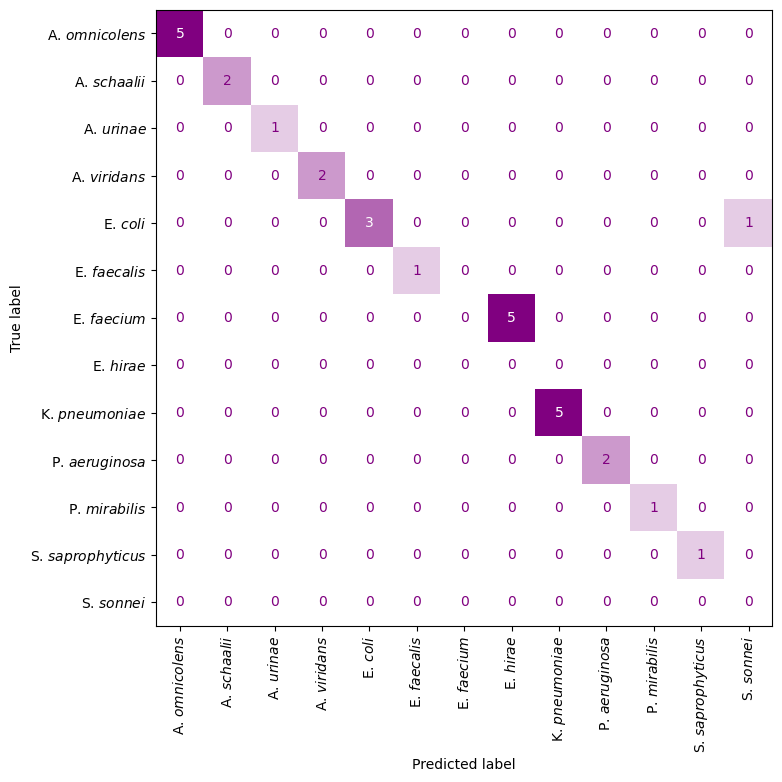

In [317]:

colors = ['white', 'purple']
new_cmap = LinearSegmentedColormap.from_list('blue_white_red', colors)

norm = mcolors.Normalize(vmin=0, vmax=10)

disp = ConfusionMatrixDisplay.from_predictions(patho_of_interest['true_species'],
                                                patho_of_interest['pred_species'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False,
                                                cmap = new_cmap
                                                )
fig = disp.ax_.get_figure() 

fig.set_figwidth(8)
fig.set_figheight(8) 

In [318]:
colors = ['white', new_cmap(0.6)]
new_cmap = LinearSegmentedColormap.from_list('blue_white_red', colors)


In [319]:
lacto_of_interest['true_species'] = lacto_of_interest['true_species'].apply(lambda x: abbreviation(x))
lacto_of_interest['pred_species'] = lacto_of_interest['pred_species'].apply(lambda x: abbreviation(x))
lacto_of_interest['lacto_species'] = lacto_of_interest['lacto_species'].apply(lambda x: abbreviation(x))

['Lactobacillus', 'gasseri']
L.  gasseri
L. $gasseri$
['Lactobacillus', 'delbrueckii']
L.  delbrueckii
L. $delbrueckii$
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
L. $rhamnosus$
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
L. $rhamnosus$
['Lactobacillus', 'acidophilus']
L.  acidophilus
L. $acidophilus$
['Lactobacillus', 'acidophilus']
L.  acidophilus
L. $acidophilus$
['Lactobacillus', 'jensenii']
L.  jensenii
L. $jensenii$
['Limosilactobacillus', 'vaginalis']
L.  vaginalis
L. $vaginalis$
['Limosilactobacillus', 'fermentum']
L.  fermentum
L. $fermentum$
['Lactobacillus', 'crispatus']
L.  crispatus
L. $crispatus$
['Lacticaseibacillus', 'casei']
L.  casei
L. $casei$
['Lactobacillus', 'iners']
L.  iners
L. $iners$
['Lactobacillus', 'jensenii']
L.  jensenii
L. $jensenii$
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
L. $rhamnosus$
['Limosilactobacillus', 'fermentum']
L.  fermentum
L. $fermentum$
['Lactobacillus', 'gasseri']
L.  gasseri
L. $gasseri$
['Lactobacillus', 'delbrue

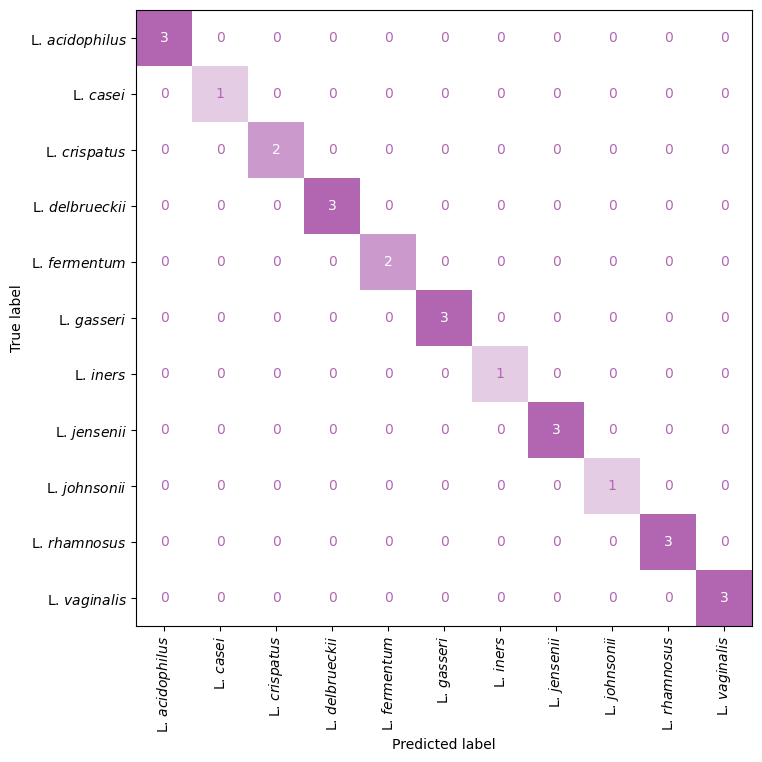

In [320]:
disp = ConfusionMatrixDisplay.from_predictions(lacto_of_interest['true_species'],
                                                lacto_of_interest['pred_species'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False,
                                                cmap = new_cmap)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8) 

Text(0, 0, 'A. $omnicolens$')


/tmp/ipykernel_303/2147879831.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels, ha="center", fontsize = 25, position = (-0.35, 0))


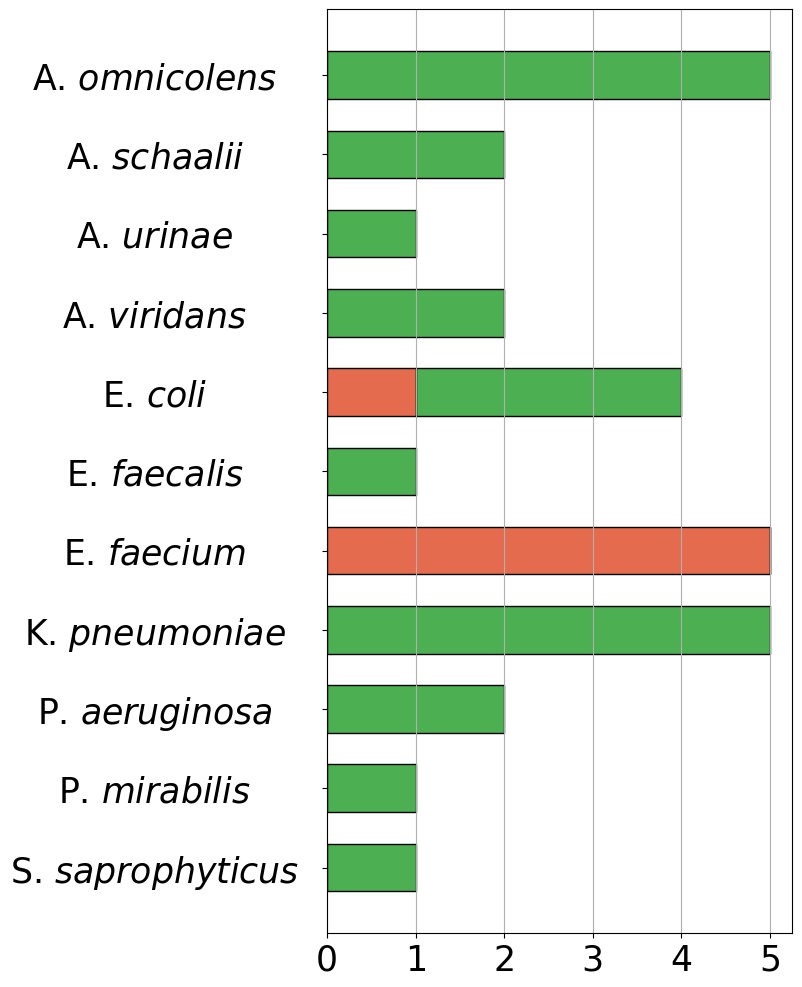

In [322]:
hist_colors = [px.colors.qualitative.G10[3], px.colors.qualitative.G10[1], px.colors.qualitative.G10[2]]

patho_of_interest = patho_of_interest.sort_values('patho_species')
xmax = max(patho_of_interest['patho_species'].value_counts())

fig = plt.figure(figsize = [6,12])


ax1 = sns.histplot(
    data = patho_of_interest, 
    y = 'patho_species', 
    hue = 'pred',
    hue_order = ['VRAI +', 'FAUX -', 'FAUX +'],
    multiple = 'stack', 
    shrink = 0.6, 
    palette = hist_colors,
    legend = False)

#sns.move_legend(ax, "upper center", ncol = 3, frameon = False, bbox_to_anchor = (.5, 1))
plt.xlabel('')
plt.ylabel('')
labels = ax1.get_yticklabels()
print(labels[0])
ax1.set_yticklabels(labels, ha="center", fontsize = 25, position = (-0.35, 0))
plt.xticks(range(0,xmax+1,1))
ax1.set_xticklabels(range(xmax+1), fontsize = 25)
plt.grid(axis = 'x')
plt.show();



/tmp/ipykernel_303/1301136598.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels, fontsize = 25, ha="center", position = (-0.3, 0))


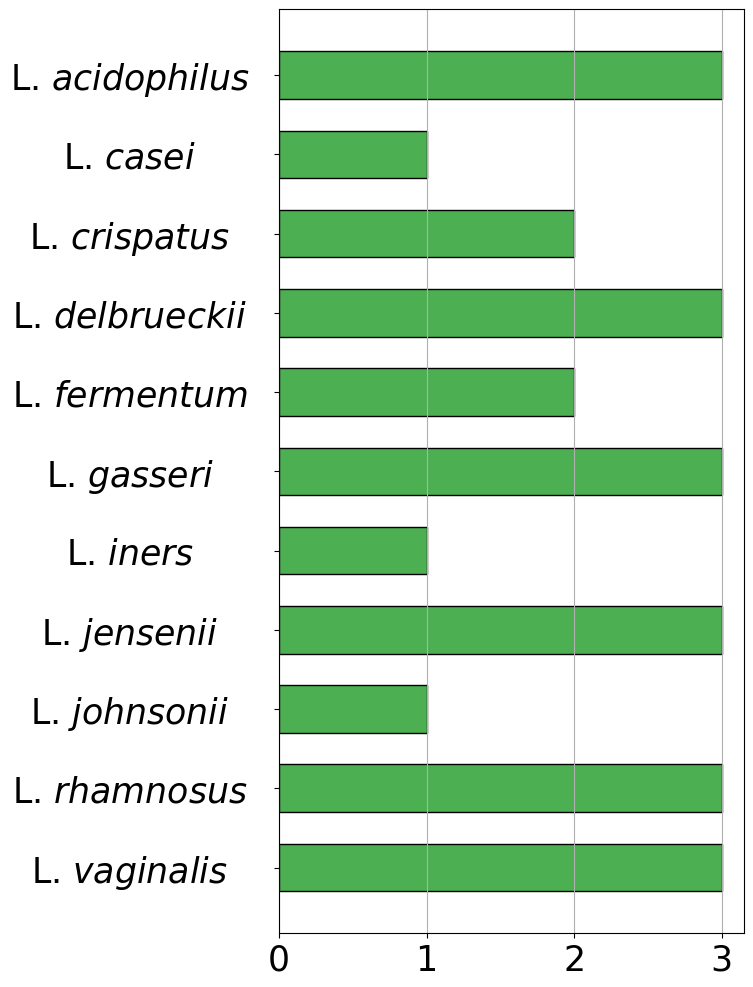

In [323]:
lacto_of_interest['correct_pred'] = (lacto_of_interest['pred_species'] == lacto_of_interest['true_species'])
lacto_of_interest = lacto_of_interest.sort_values('true_species')
xmax = max(lacto_of_interest['true_species'].value_counts())

fig = plt.figure(figsize = [6, 12])


ax2 = sns.histplot(
    data = lacto_of_interest,
    y = 'lacto_species', 
    hue = 'pred', 
    hue_order = ['VRAI +', 'FAUX -', 'FAUX +'],
    multiple = 'stack', 
    shrink = 0.6, 
    legend = False, 
    palette = hist_colors)

plt.xlabel('')
plt.ylabel('')
labels = ax2.get_yticklabels()
ax2.set_yticklabels(labels, fontsize = 25, ha="center", position = (-0.3, 0))
plt.xticks(range(0,xmax+1,1))
ax2.set_xticklabels([0, 1, 2, 3], fontsize = 25, )
plt.grid(axis = 'x')
plt.show();

In [324]:
common_genus = ['Aerococcus', 'Anaerococcus', 'Actinomyces', 'Actinotignum', 'Alloscardovia', 'Bifidobacterium', 'Corynebacterium', 'Dialister', 'Enterococcus', 'Escherichia', 'Facklamia', 'Fannyhessea', 'Finegoldia', 'Gardnerella', 'Klebsiella', 'Lacticaseibacillus', 'Lactobacillus', 'Limosilactobacillus', 'Prevotella', 'Propionimicrobium', 'Proteus', 'Ralstonia', 'Staphylococcus', 'Streptococcus', 'Winkia']

In [325]:
genus_of_interest = global_data.loc[(global_data['true_genus'].isin(common_genus)) | (global_data['pred_genus'].isin(common_genus))]

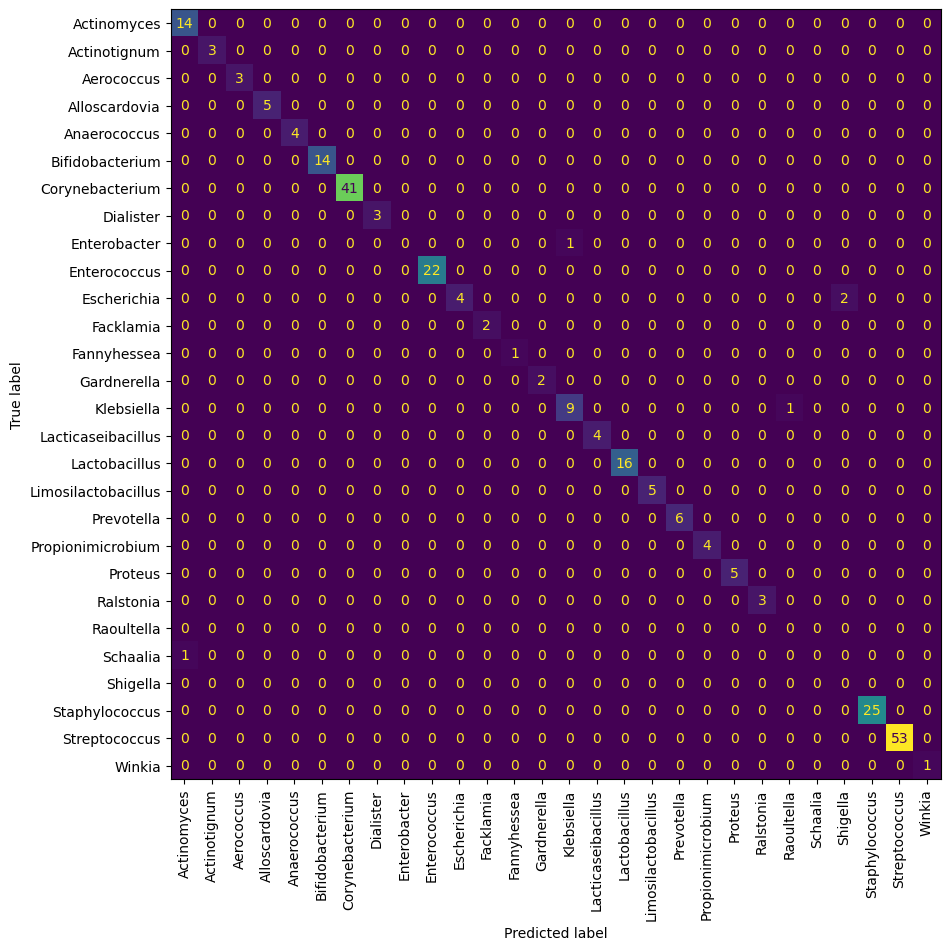

In [326]:
disp = ConfusionMatrixDisplay.from_predictions(genus_of_interest['true_genus'],
                                                genus_of_interest['pred_genus'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False)
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 

In [327]:
print(classification_report(species_of_interest['true_genus'], species_of_interest['pred_genus'], zero_division = np.nan))

NameError: name 'species_of_interest' is not defined

<Axes: >

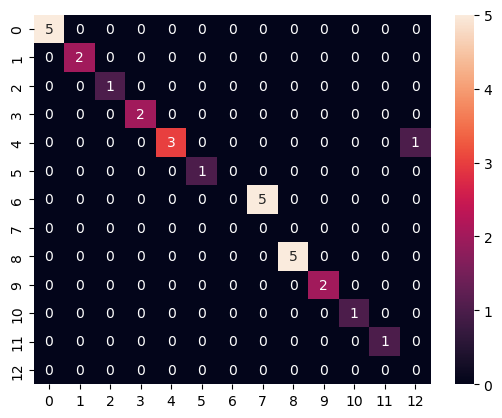

In [ ]:
cm = confusion_matrix(patho_of_interest['true_species'],
                                                patho_of_interest['pred_species']
                                                #xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                #colorbar = False,
                                                #cmap = 'OrRd'
                                                )


sns.heatmap(cm, annot = True, cmap= )
